In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import preprocessing

In [38]:
data=pd.read_csv("saved.csv")
train = pd.DataFrame(data[0:int(len(data)*0.80)])
train_y = train["targetClass"]
test = pd.DataFrame(data[int(len(data)*0.80): int(len(data))])
test_y = test["targetClass"]
train.drop(["targetClass","target"], axis=1, inplace=True)
test.drop(["targetClass","target"], axis=1, inplace=True)

In [39]:
scaler=preprocessing.StandardScaler() #We do not actually have to standardize since tree based algorithms are scale invariant but it is still practical
train=scaler.fit_transform(train)
test=scaler.transform(test)

In [51]:
import numpy as np
import xgboost as xgb
train = np.array(train)
test = np.array(test)

model_xgboost = xgb.XGBClassifier(
    objective="binary:logistic", 
    learning_rate=0.0007,
    max_depth=15,
    n_estimators=10,
    subsample=1.0,
    colsample_bytree=1.0,
    eval_metric="auc",
    reg_alpha=0.1,  
    reg_lambda=0.1, 
    verbosity=1,
    use_label_encoder=False  
)

eval_set = [(test, test_y)]

model_xgboost.fit(
    train,
    train_y,
    eval_set=eval_set,
    verbose=True
)


[0]	validation_0-auc:0.47696
[1]	validation_0-auc:0.48125
[2]	validation_0-auc:0.48315
[3]	validation_0-auc:0.48249
[4]	validation_0-auc:0.48375


C:\Users\erena\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\xgboost\core.py:158: UserWarning: [14:30:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[5]	validation_0-auc:0.48333
[6]	validation_0-auc:0.48171
[7]	validation_0-auc:0.48243
[8]	validation_0-auc:0.48098
[9]	validation_0-auc:0.48195
[10]	validation_0-auc:0.48225
[11]	validation_0-auc:0.48243
[12]	validation_0-auc:0.48171
[13]	validation_0-auc:0.48249
[14]	validation_0-auc:0.48189
[15]	validation_0-auc:0.48279
[16]	validation_0-auc:0.48189
[17]	validation_0-auc:0.48249
[18]	validation_0-auc:0.48165
[19]	validation_0-auc:0.48249
[20]	validation_0-auc:0.48189
[21]	validation_0-auc:0.48249
[22]	validation_0-auc:0.48131
[23]	validation_0-auc:0.48222
[24]	validation_0-auc:0.48174
[25]	validation_0-auc:0.48240
[26]	validation_0-auc:0.48180
[27]	validation_0-auc:0.48192
[28]	validation_0-auc:0.48228
[29]	validation_0-auc:0.48246
[30]	validation_0-auc:0.48240
[31]	validation_0-auc:0.48282
[32]	validation_0-auc:0.48300
[33]	validation_0-auc:0.48300
[34]	validation_0-auc:0.48228
[35]	validation_0-auc:0.48234
[36]	validation_0-auc:0.48234
[37]	validation_0-auc:0.48276
[38]	validation

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.0007, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

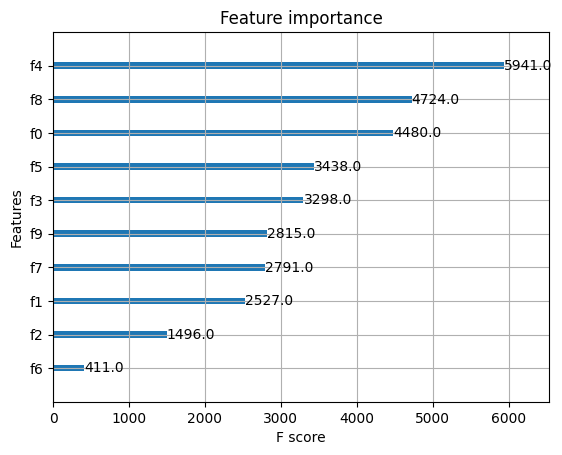

In [56]:
from xgboost import plot_importance

plot_importance(model_xgboost)
plt.show()

In [57]:
y_pred = model_xgboost.predict(test)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(test_y, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.5307692307692308


In [58]:
from skopt import BayesSearchCV  #implementing bayesian search instead of grid search since grid search is computationaly too expensive
from xgboost import XGBClassifier
param_space = {
    'learning_rate': (0.005, 0.1, 'log-uniform'),
    'max_depth': (2, 20),                        
    'n_estimators': (5, 1000),                 
    'colsample_bytree': (0.6, 1.0),              
    'subsample': (0.6, 1.0),                    
    'gamma': (0.0, 1.0),                         
    'min_child_weight': (1, 10)                  
}

xgb_model = XGBClassifier(
    random_state=42, 
    use_label_encoder=False,
    eval_metric='logloss'
)

bayes_search = BayesSearchCV(
    estimator=xgb_model,
    search_spaces=param_space,
    n_iter=50,
    scoring='accuracy',
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

bayes_search.fit(train, train_y)

# Best parameters and model
print("Best Hyperparameters:", bayes_search.best_params_)


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fi

C:\Users\erena\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\xgboost\core.py:158: UserWarning: [16:21:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [59]:
best_xgb_model = bayes_search.best_estimator_

y_pred = best_xgb_model.predict(test)
accuracy = accuracy_score(test_y, y_pred)
print(f"Test Set Accuracy: {accuracy:.4f}")

Test Set Accuracy: 0.5615
